In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (modify the file path as needed)
location = "default of credit card clients.xls"
df = pd.read_excel(location, header=1)

print(df)

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Summary statistics
print("Summary Statistics:")
print(df.describe())

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

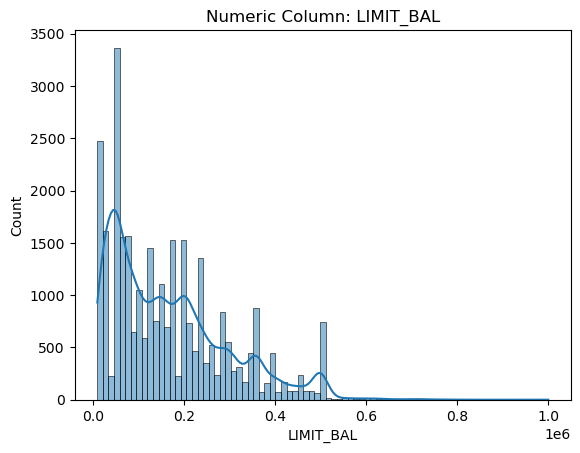

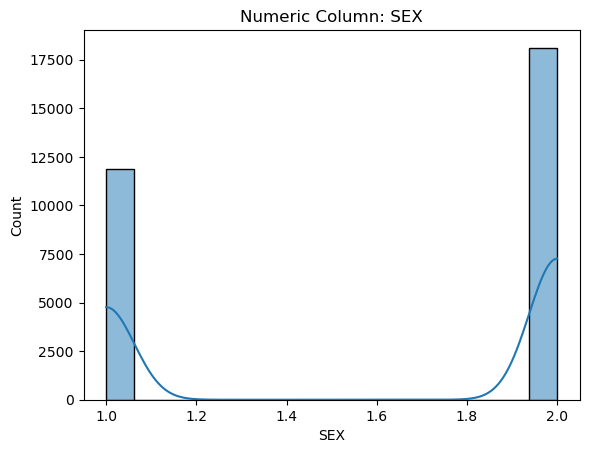

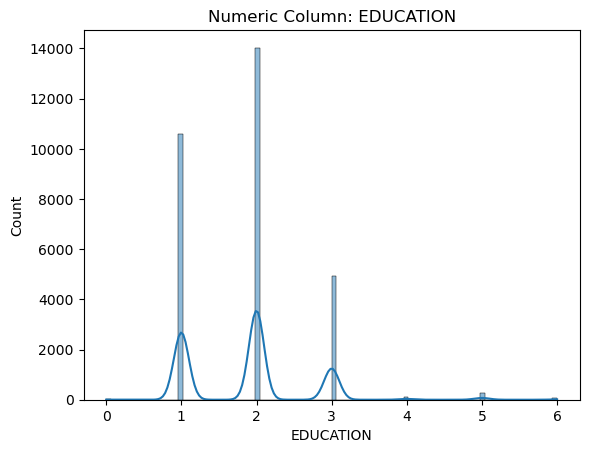

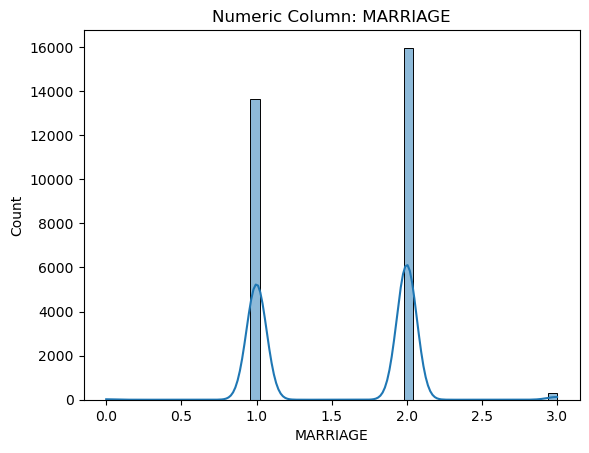

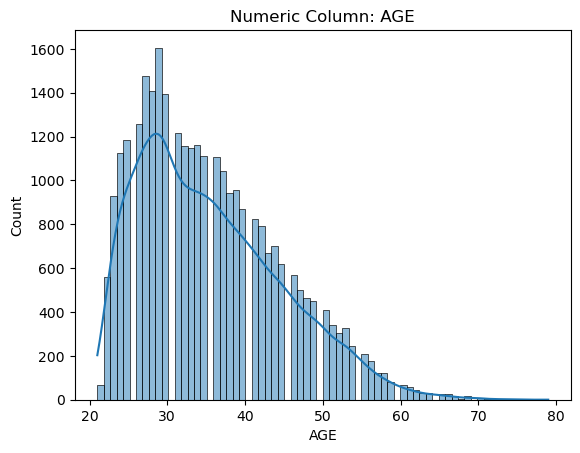

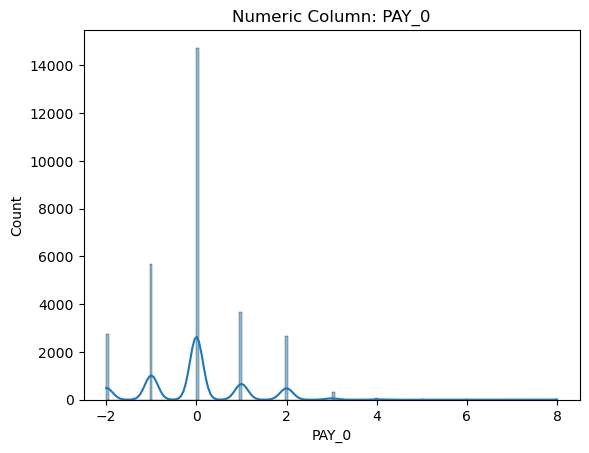

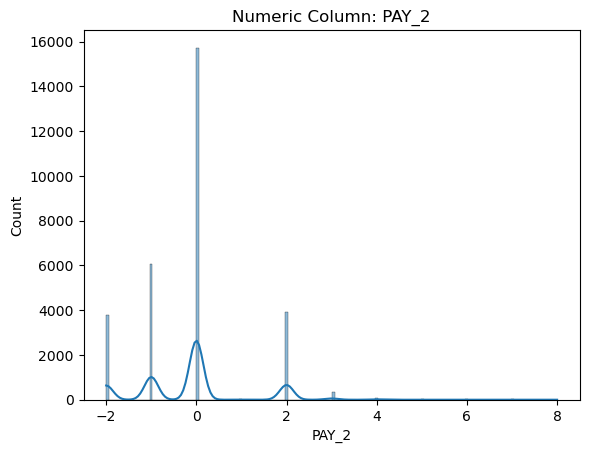

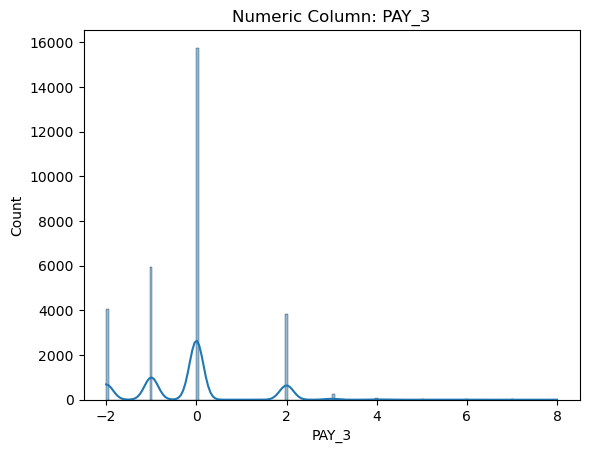

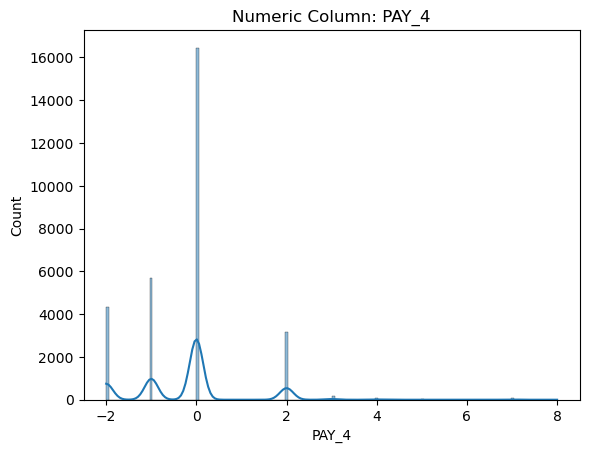

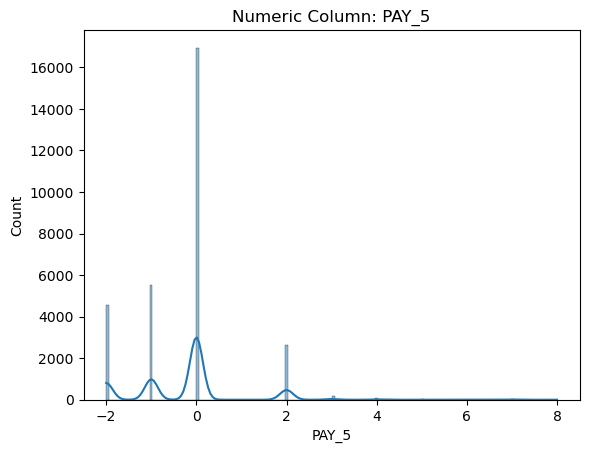

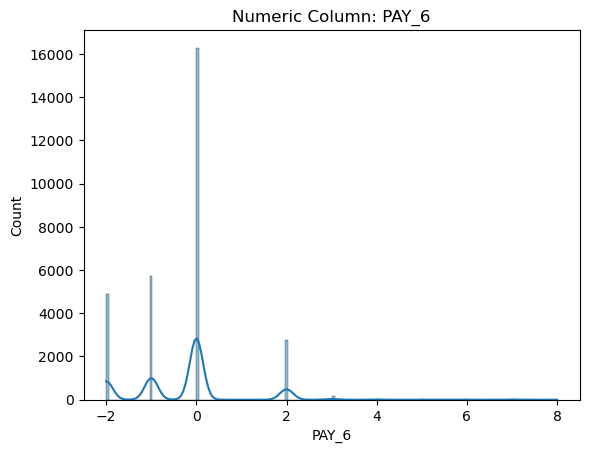

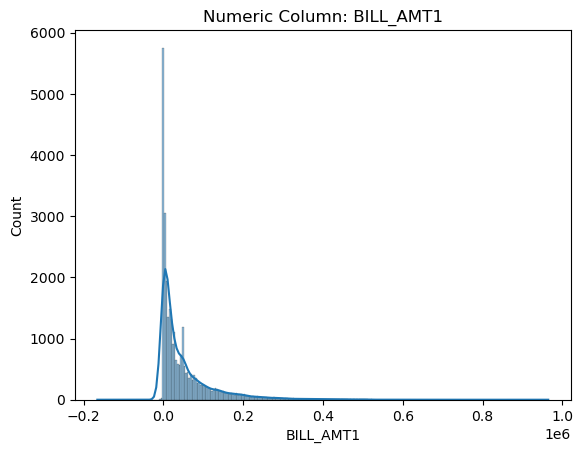

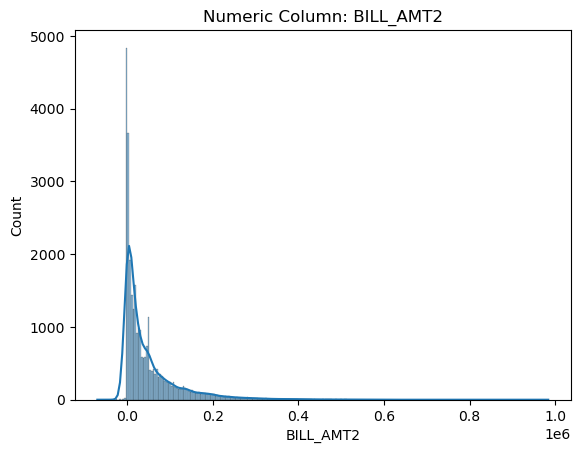

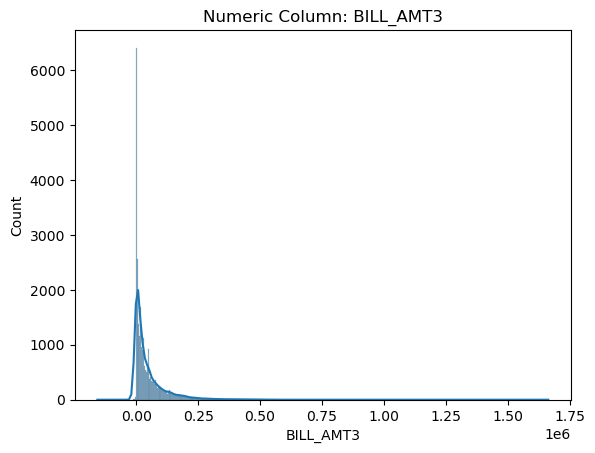

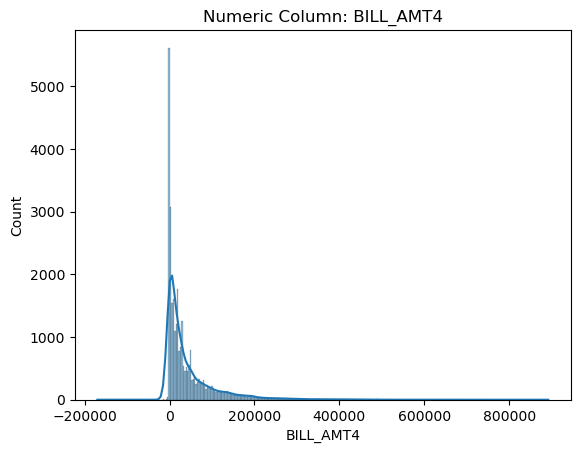

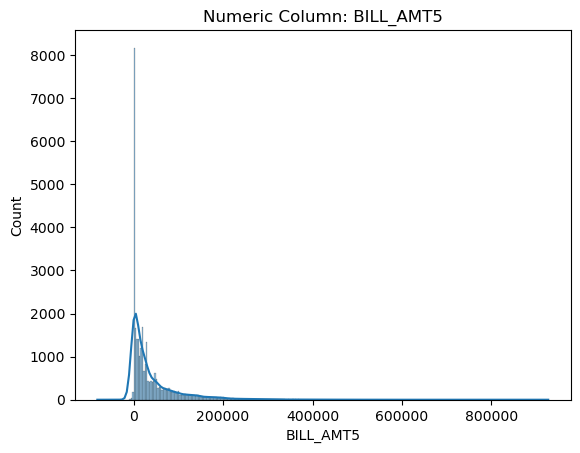

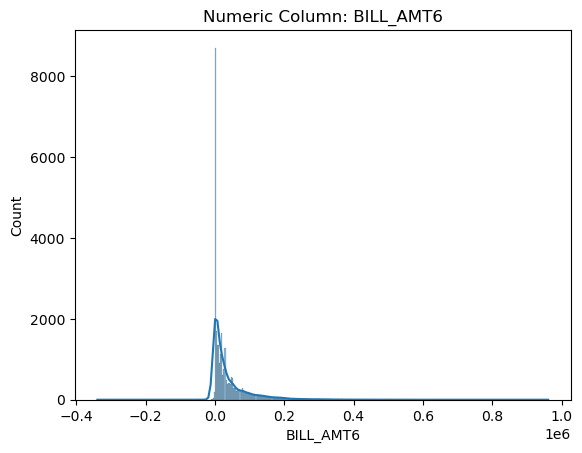

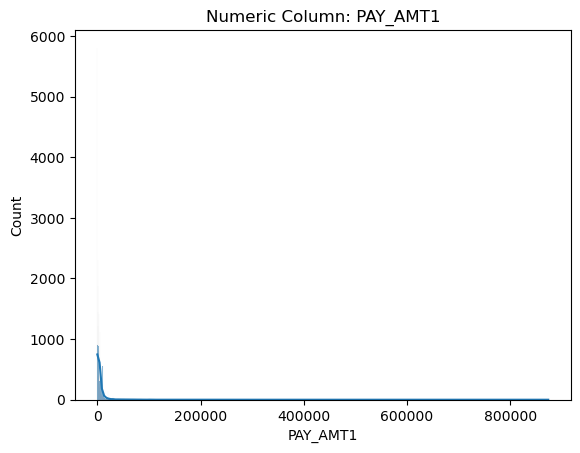

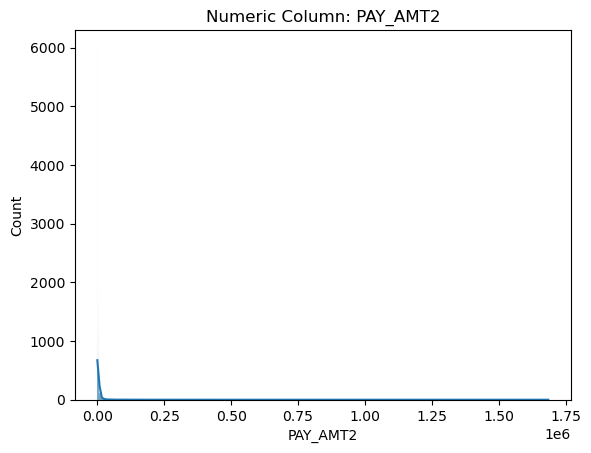

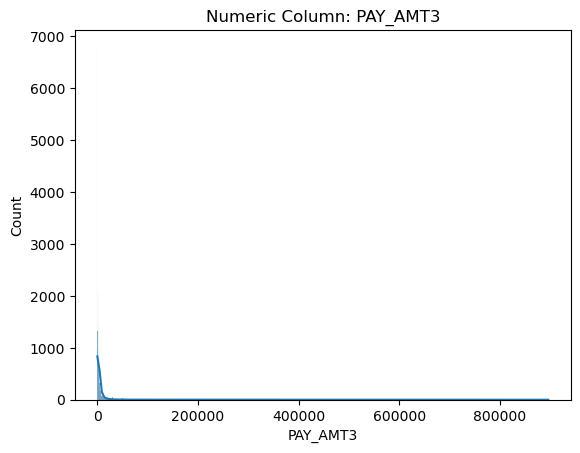

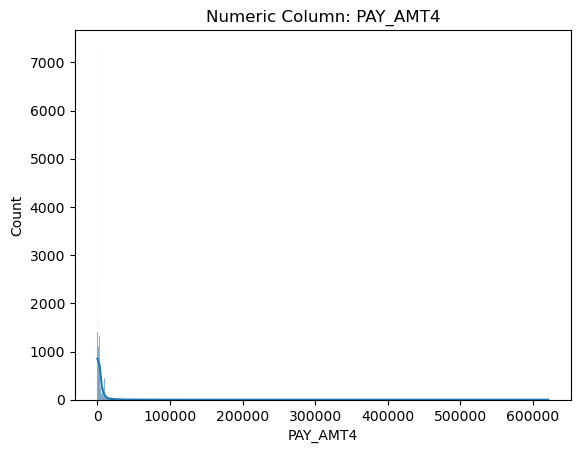

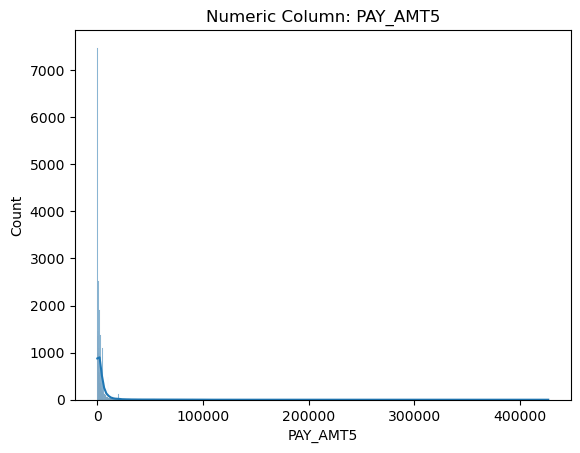

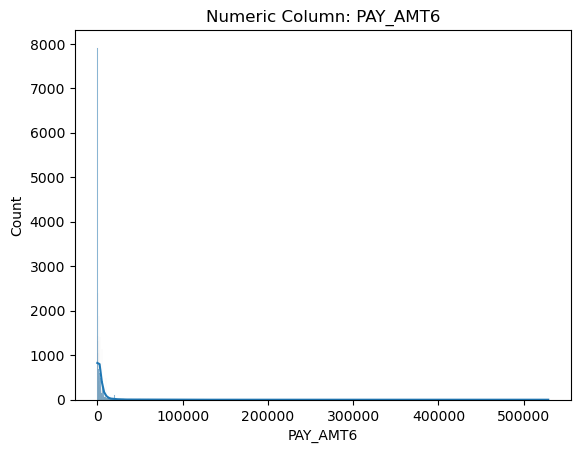

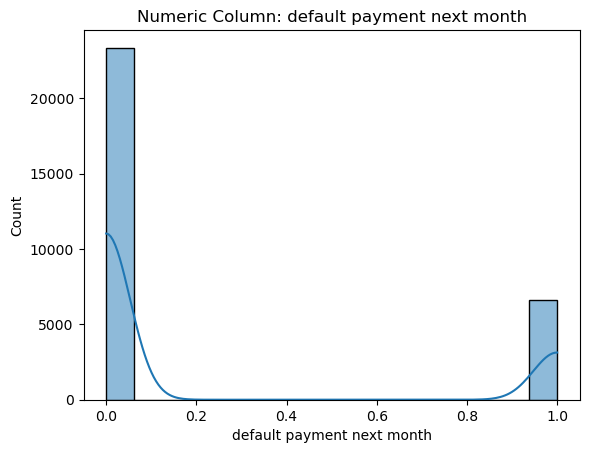

In [2]:
#Dropping ID
df = df.drop('ID', axis=1)

# Loop over all columns in the DataFrame
for column in df.columns:
    column_data = df[column]
    data_type = column_data.dtype

    if data_type in ['int64', 'float64']:
        # For numerical columns, plot a histogram to visualize the distribution
        plt.figure()
        sns.histplot(column_data, kde=True)
        plt.title(f'Numeric Column: {column}')
        plt.show()
    else:
        # For categorical columns, plot a bar plot to visualize the frequency
        plt.figure()
        sns.countplot(column_data)
        plt.title(f'Category Column: {column}')
        plt.show()


From All the distributions almost all the features columns are approxiamately normally distributed.Scaling them before fitting a model will help us in optimal models.

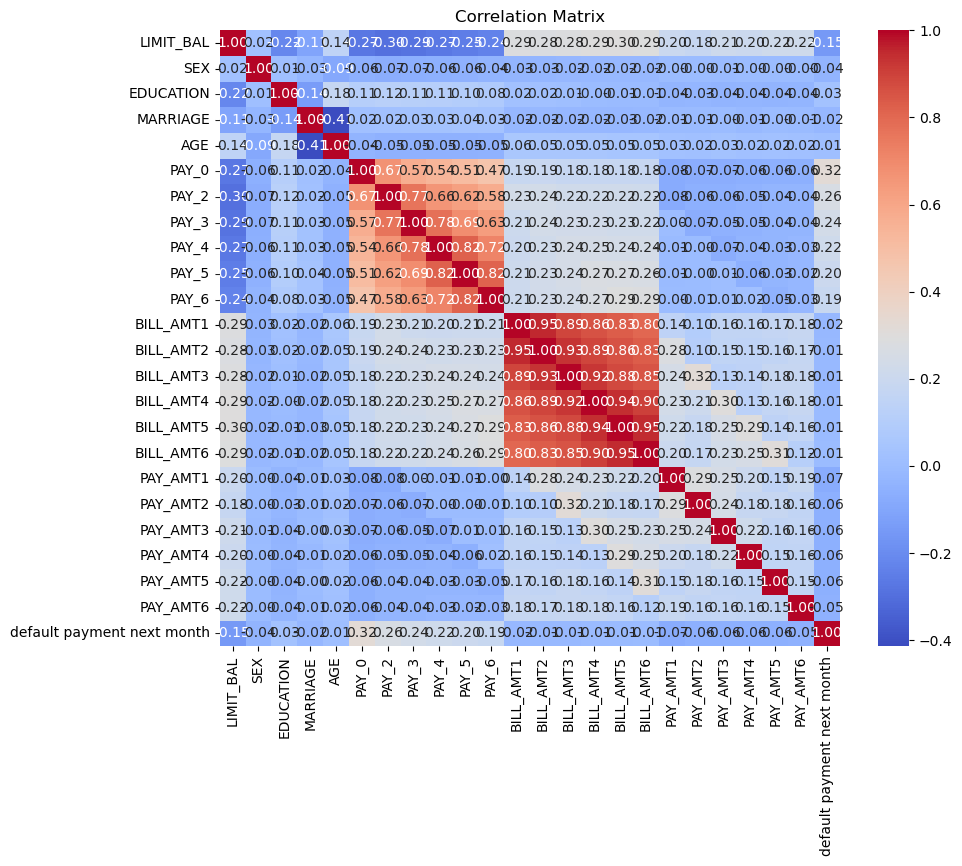

In [3]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

The Bill Amount and Pay are highly Correlated from the correlation matrix averaging them out will result in redundancy in columns and will remove correlation in the DataSet. 

In [4]:
# Calculate the averages
BILL_AMT = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
PAY = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

# Create DataFrames for X and Y
df_X = pd.DataFrame({'BILL_AMT': BILL_AMT})
df_Y = pd.DataFrame({'PAY': PAY})

# Concatenate X and Y as a new dataset
concatenated_df = pd.concat([df_X, df_Y], axis=1)

print(concatenated_df)

df=pd.concat([concatenated_df,df ], axis=1)
# Drop the original columns
df = df.drop(columns=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                      'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

# Print the updated DataFrame
print(df)

            BILL_AMT       PAY
0        1284.000000 -0.333333
1        2846.166667  0.500000
2       16942.166667  0.000000
3       38555.666667  0.000000
4       18223.166667 -0.333333
...              ...       ...
29995  120891.500000  0.000000
29996    3530.333333 -0.666667
29997   11749.333333  1.333333
29998   44435.166667 -0.166667
29999   38479.000000  0.000000

[30000 rows x 2 columns]
            BILL_AMT       PAY  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  \
0        1284.000000 -0.333333      20000    2          2         1   24   
1        2846.166667  0.500000     120000    2          2         2   26   
2       16942.166667  0.000000      90000    2          2         2   34   
3       38555.666667  0.000000      50000    2          2         1   37   
4       18223.166667 -0.333333      50000    1          2         1   57   
...              ...       ...        ...  ...        ...       ...  ...   
29995  120891.500000  0.000000     220000    1          3         1   

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

# Data preprocessing
X = df.iloc[:, 0:-1]  # Features (columns 2 through the second-to-last column)
y = df.iloc[:, -1]    # Target variable (default payment next month)

# Define which features need to be standardized (excluding SEX, MARRIAGE, and EDUCATION)
numerical_features = ['BILL_AMT','PAY','LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Create a DataFrame for the features that need scaling
X_scaled = X[numerical_features].copy()

# Standardize the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)

# Replace the scaled features in the original DataFrame
X[numerical_features] = X_scaled

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Save the scaler using joblib
scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)


['scaler.pkl']

Fitting a Logistic Regression Model

Accuracy: 0.794
Confusion Matrix:
[[4574  113]
 [1123  190]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4687
           1       0.63      0.14      0.24      1313

    accuracy                           0.79      6000
   macro avg       0.71      0.56      0.56      6000
weighted avg       0.76      0.79      0.74      6000

ROC AUC: 0.6921347162534606


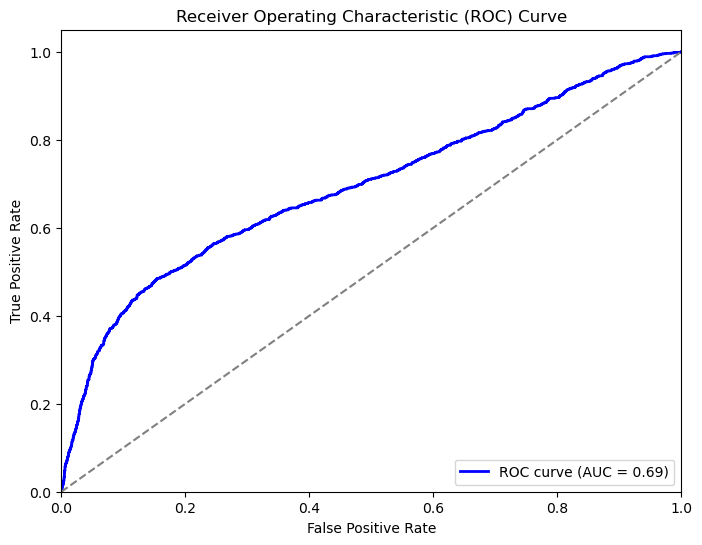

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)
print(f"ROC AUC: {roc_auc}")

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Get the probabilities for the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Fitting a Random Forest Regression Model

Random Forest Model:
Accuracy: 0.8036666666666666
Confusion Matrix:
[[4381  306]
 [ 872  441]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4687
           1       0.59      0.34      0.43      1313

    accuracy                           0.80      6000
   macro avg       0.71      0.64      0.65      6000
weighted avg       0.78      0.80      0.78      6000

ROC AUC: 0.7414473537751108


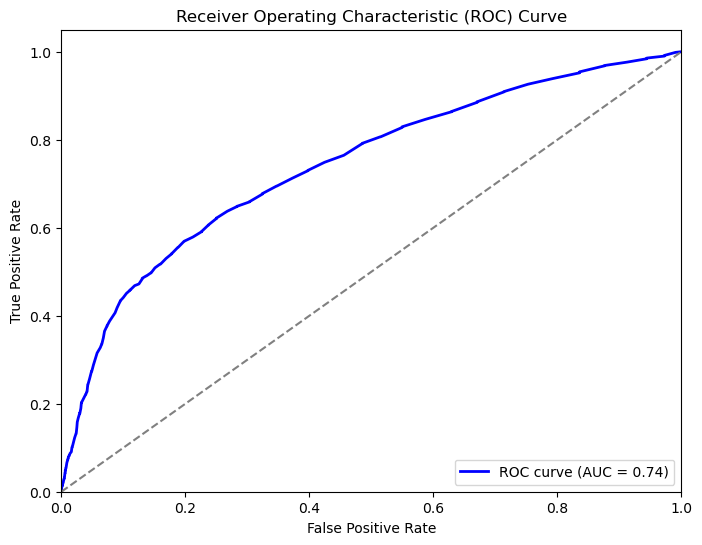

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Create and train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate ROC AUC
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print Random Forest results
print("Random Forest Model:")
print(f"Accuracy: {accuracy_rf}")
print("Confusion Matrix:")
print(confusion_rf)
print("Classification Report:")
print(classification_rep_rf)
print(f"ROC AUC: {roc_auc_rf}")

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Fitting a XG Boost Model

XGBoost Model:
Accuracy: 0.8046666666666666
Confusion Matrix:
[[4391  296]
 [ 876  437]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4687
           1       0.60      0.33      0.43      1313

    accuracy                           0.80      6000
   macro avg       0.71      0.63      0.65      6000
weighted avg       0.78      0.80      0.78      6000

ROC AUC: 0.756304120014995


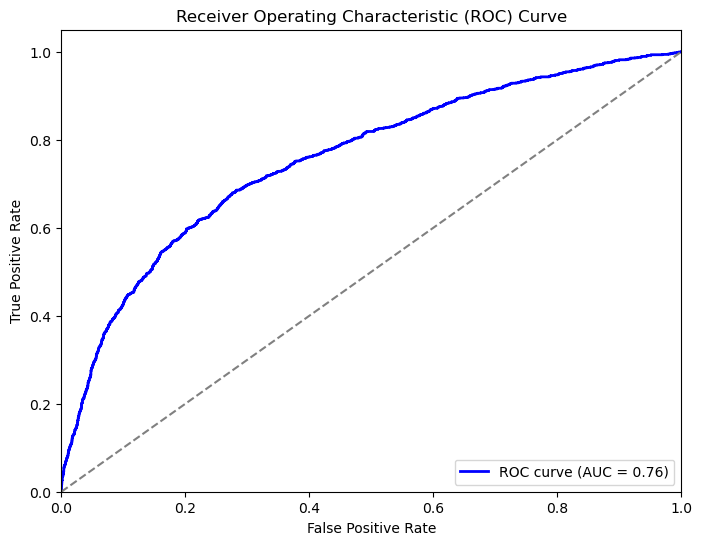

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Create and train an XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate ROC AUC
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Print XGBoost results
print("XGBoost Model:")
print(f"Accuracy: {accuracy_xgb}")
print("Confusion Matrix:")
print(confusion_xgb)
print("Classification Report:")
print(classification_rep_xgb)
print(f"ROC AUC: {roc_auc_xgb}")

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Get the probabilities for the positive class (class 1)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [9]:
import pickle

# Save the XGBoost model to a file
model_filename = 'xgb_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(xgb_model, model_file)
print(f"XGBoost model saved to {model_filename}")


XGBoost model saved to xgb_model.pkl


In [ ]:
# save in JSON format
xgb_model.save_model("xgb_model.json")